### Single hidden layer neural networks

Neural network implemented here will contain 2 input nodes, 6 hidden nodes and a binary output (i.e. 1 node). While training a neural network, the shapes which eaech node accepts has to be kept in mind. The loss function in neural networks typically is the loss function used for logistic regression. If the output layer has more than 2 nodes, then a categorical cross-entropy loss is used.<br>
$$
J(\boldsymbol{w},b) = - \frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \big(1 - \log(\hat{y}^{(i)})\big) \Big] 
$$<br>


#### Training
It consists the following steps:
1. Initialize the parameters (i.e. the weights and biases)
2. Repeat until convergence:
    - Propagate the current input batch forward through the network. To do so, compute the activations and outputs of all hidden and output units.
    - Compute the partial derivatives of the loss function with respect to each parameter
    - Update the parameters
    
The training part of neural network consists of two stages:
1. Forward Pass
2. Backward Pass

##### Forward Pass
In the forward pass, we calculate the activation and output of each layer. Since neural networks have a lot of combination of nodes, we will implement the activation and output of layers through vectorization.
- $\boldsymbol{A}_h$: matrix with activations of all hidden units for all training examples
- $\boldsymbol{O}_h$: matrix with outputs of all hidden units for all training examples

In this model, hidden layers will have $\tanh$ as their activation function: $$
\tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac{\exp(x) - exp(-x)}{\exp(x) + exp(-x)}
$$$$
\tanh'(x) = 1 - tanh^2(x)
$$

The output neurons will have the $\textit{sigmoid}$ activation function: $$
\sigma(x) = \frac{1}{1 + \exp(-x)}
$$$$
\sigma'(x) = 1 - (1 + \sigma(x))
$$

The activations and outputs can then be computed as follows ($\cdot$ denotes the dot product):

$$
\boldsymbol{A}_h = \boldsymbol{X} \cdot \boldsymbol{W}_h + \boldsymbol{b}_h
$$
$$
\boldsymbol{O}_h = \sigma(\boldsymbol{A}_h)
$$$$
\boldsymbol{A}_o = \boldsymbol{O}_h \cdot \boldsymbol{W}_o + b_o
$$$$
\boldsymbol{O}_o = \sigma(\boldsymbol{A}_o)
$$

##### Backward Pass
In backward pass, we update the weights. How that is achieved is through partial derivatives of the loss function w.r.t. each unit.
For the output neurons, the gradients are given by (matrix notation):

$\frac{\partial L}{\partial \boldsymbol{A}_o} = d\boldsymbol{A}_o = (\boldsymbol{O}_o - \boldsymbol{Y})$

$\frac{\partial L}{\partial \boldsymbol{W}_o} = \frac{1}{m} (\boldsymbol{O}_h^T \cdot d\boldsymbol{A}_o)$

$\frac{\partial L}{\partial \boldsymbol{b}_o} = \frac{1}{m} \sum d\boldsymbol{A}_o$

For the weight matrix between input and hidden layer we have:
$\frac{\partial L}{\partial \boldsymbol{A}_h} = d\boldsymbol{A}_h = (\boldsymbol{W}_o^T \cdot d\boldsymbol{A}_o) * (1 - \tanh^2 (\boldsymbol{A}_h))$

$\frac{\partial L}{\partial \boldsymbol{W}_h} = \frac{1}{m} (\boldsymbol{X}^T \cdot d\boldsymbol{A}_h)$

$\frac{\partial L}{\partial \boldsymbol{b}_h} = \frac{1}{m} \sum d\boldsymbol{A}_h$

Weight Update
$\boldsymbol{W}_h = \boldsymbol{W}_h - \eta * \frac{\partial L}{\partial \boldsymbol{W}_h}$

$\boldsymbol{b}_h = \boldsymbol{b}_h - \eta * \frac{\partial L}{\partial \boldsymbol{b}_h} $

$\boldsymbol{W}_o = \boldsymbol{W}_o - \eta *   \frac{\partial L}{\partial \boldsymbol{W}_o} $

$\boldsymbol{b}_o = \boldsymbol{b}_o - \eta *  \frac{\partial L}{\partial \boldsymbol{b}_o} $

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
np.random.seed(2019)

### Dataset

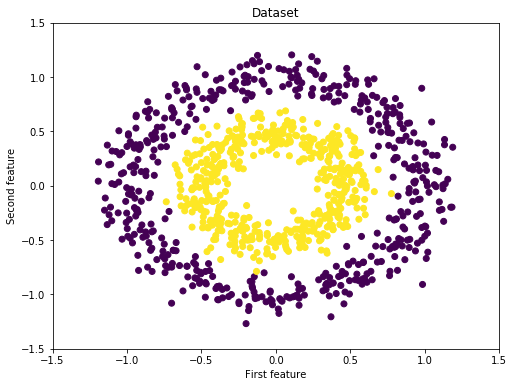

In [2]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=.1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [5]:
# reshape targets to get column vector with shape (n_samples, 1)
y_true = y[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


### Neural Net Class

In [10]:
class NeuralNet():
    def __init__(self, n_inputs, n_outputs, n_hidden):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.n_hidden = n_hidden
        
        self.W_h = np.random.randn(self.n_inputs, self.n_hidden)
        self.b_h = np.zeros((1, self.n_hidden))
        self.W_o = np.random.randn(self.n_hidden, self.n_outputs)
        self.b_o = np.zeros((1, self.n_outputs))
        
    def sigmoid(self, a):
        return 1/(1+np.exp(-a))
    
    def forward_pass(self, X):
        A_h = np.dot(X, self.W_h) + self.b_h
        O_h = np.tanh(A_h)
        A_o = np.dot(O_h, self.W_o) + self.b_o
        O_o = self.sigmoid(A_o)
        
        outputs = {
                "A_h": A_h,
                "A_o": A_o,
                "O_h": O_h,
                "O_o": O_o,
                }

        return outputs
    
    def cost(self, y_true, y_predict, n_samples):
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        cost = np.squeeze(cost)
        assert isinstance(cost, float)

        return cost
    
    def backward_pass(self, X, Y, n_samples, outputs):
        dA_o = (outputs['O_o'] - Y)
        dW_o = (1/n_samples)*np.dot(outputs['O_h'].T, dA_o)
        db_o = (1/n_samples)*np.sum(dA_o)
        
        dA_h = (np.dot(dA_o, self.W_o.T))*(1 - np.power(outputs['O_h'], 2))
        dW_h = (1/n_samples)*np.dot(X.T, dA_h)
        db_h = (1/n_samples)*np.sum(dA_h)
        
        gradients = {
                "dW_o": dW_o,
                "db_o": db_o,
                "dW_h": dW_h,
                "db_h": db_h,
                }

        return gradients
    
    def update_weights(self, gradients, eta):
        self.W_h = self.W_h - eta*gradients['dW_h']
        self.b_h = self.b_h - eta*gradients['db_h']
        self.W_o = self.W_o - eta*gradients['dW_o']
        self.b_o = self.b_o - eta*gradients['db_o']
    
    def train(self, X, y, n_iters=300, eta=0.003):
        n_samples = X.shape[0]
        
        for i in range(n_iters):
            outputs = self.forward_pass(X)
            cost = self.cost(y, outputs["O_o"], n_samples=n_samples)
            gradients = self.backward_pass(X, y, n_samples, outputs)
            
            if i%100 == 0:
                print(f'Cost at iteration {i} is {np.round(cost,3)}')
                
            self.update_weights(gradients, eta)
            
    def predict(self, X):
        outputs = self.forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["O_o"]]

        return np.array(y_pred)[:, np.newaxis]

### Initialize and train the neural network

In [12]:
nn = NeuralNet(n_inputs=2, n_hidden=6, n_outputs=1)
print(f'Shape W_h: {nn.W_h.shape}')
print(f'Shape b_h: {nn.b_h.shape}')
print(f'Shape W_o: {nn.W_o.shape}')
print(f'Shape b_o: {nn.b_o.shape}')

print("Training...")
nn.train(X_train, y_train, n_iters=1500, eta=0.09)

Shape W_h: (2, 6)
Shape b_h: (1, 6)
Shape W_o: (6, 1)
Shape b_o: (1, 1)
Training...
Cost at iteration 0 is 1.124
Cost at iteration 100 is 0.691
Cost at iteration 200 is 0.678
Cost at iteration 300 is 0.641
Cost at iteration 400 is 0.591
Cost at iteration 500 is 0.542
Cost at iteration 600 is 0.498
Cost at iteration 700 is 0.45
Cost at iteration 800 is 0.395
Cost at iteration 900 is 0.341
Cost at iteration 1000 is 0.294
Cost at iteration 1100 is 0.258
Cost at iteration 1200 is 0.231
Cost at iteration 1300 is 0.211
Cost at iteration 1400 is 0.196


### Testing

In [14]:
n_test_samples = X_test.shape[0]
y_predict = nn.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples)*100} %")

Classification accuracy on test set: 96.8 %


### Visualizing decision boundary

In [15]:
X_temp, y_temp = make_circles(n_samples=60000, noise=.5)
y_predict_temp = nn.predict(X_temp)
y_predict_temp = np.ravel(y_predict_temp)

Text(0.5,1,'Decision boundary')

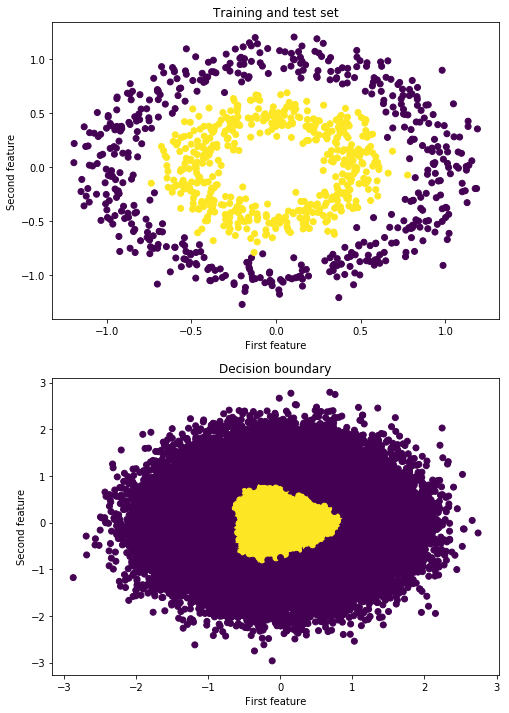

In [17]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Training and test set")

ax = fig.add_subplot(2,1,2)
plt.scatter(X_temp[:,0], X_temp[:,1], c=y_predict_temp)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Decision boundary")